In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [3]:
# Currently reading in the final NBA data csv
df = pd.read_csv(r'~/NBA_Model_hyperTuning/nba_data/nba_df_final.csv')

#Drop various statistics that are not needed
final_df = df.drop(['Home', 'Away', 'Game_ID', 'H_Score', 'A_Score', 'Date', 'Season', 'H_Team_Elo_After', 'A_Team_Elo_After'], 1)


In [4]:
# confirming that our DF looks like we need it to
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   H_W_PCT            2820 non-null   float64
 1   H_FG_PCT           2820 non-null   float64
 2   H_FG3_PCT          2820 non-null   float64
 3   H_FT_PCT           2820 non-null   float64
 4   H_REB              2820 non-null   float64
 5   H_AST              2820 non-null   float64
 6   H_TOV              2820 non-null   float64
 7   H_STL              2820 non-null   float64
 8   H_BLK              2820 non-null   float64
 9   H_PLUS_MINUS       2820 non-null   float64
 10  H_OFF_RATING       2820 non-null   float64
 11  H_DEF_RATING       2820 non-null   float64
 12  H_TS_PCT           2820 non-null   float64
 13  A_W_PCT            2820 non-null   float64
 14  A_FG_PCT           2820 non-null   float64
 15  A_FG3_PCT          2820 non-null   float64
 16  A_FT_PCT           2820 

,H_W_PCT,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PLUS_MINUS,H_OFF_RATING,H_DEF_RATING,H_TS_PCT,H_Team_Elo_Before,Home_W_Pct_10,Result
H_W_PCT,1.000000,0.502169,0.320349,-0.155375,0.033368,0.330985,0.891830,0.618593,-0.620302,0.563872,0.767739,0.660715,0.216308
H_REB,0.502169,1.000000,-0.008317,-0.068732,-0.271590,0.192550,0.528072,0.254589,-0.482581,0.030882,0.412460,0.305859,0.146231
H_AST,0.320349,-0.008317,1.000000,-0.065049,0.128100,0.122288,0.358229,0.417479,-0.071698,0.462691,0.265842,0.253016,0.078898
H_TOV,-0.155375,-0.068732,-0.065049,1.000000,0.053479,-0.075850,-0.192301,-0.359585,-0.104379,0.034659,-0.192787,-0.110525,-0.045599
H_STL,0.033368,-0.271590,0.128100,0.053479,1.000000,0.107730,0.057074,-0.156192,-0.237752,-0.142529,0.007423,0.039039,-0.000680
H_BLK,0.330985,0.192550,0.122288,-0.075850,0.107730,1.000000,0.356752,0.117938,-0.386144,0.108822,0.360240,0.241473,0.117469
H_PLUS_MINUS,0.891830,0.528072,0.358229,-0.192301,0.057074,0.356752,1.000000,0.705429,-0.683897,0.637038,0.810649,0.633992,0.232983
H_OFF_RATING,0.618593,0.254589,0.417479,-0.359585,-0.156192,0.117938,0.705429,1.000000,0.032173,0.834106,0.582885,0.453134,0.152380
H_DEF_RATING,-0.620302,-0.482581,-0.071698,-0.104379,-0.237752,-0.386144,-0.683897,0.032173,1.000000,-0.042152,-0.545494,-0.427608,-0.171022
H_TS_PCT,0.563872,0.030882,0.462691,0.034659,-0.142529,0.108822,0.637038,0.834106,-0.042152,1.000000,0.540426,0.443997,0.137470


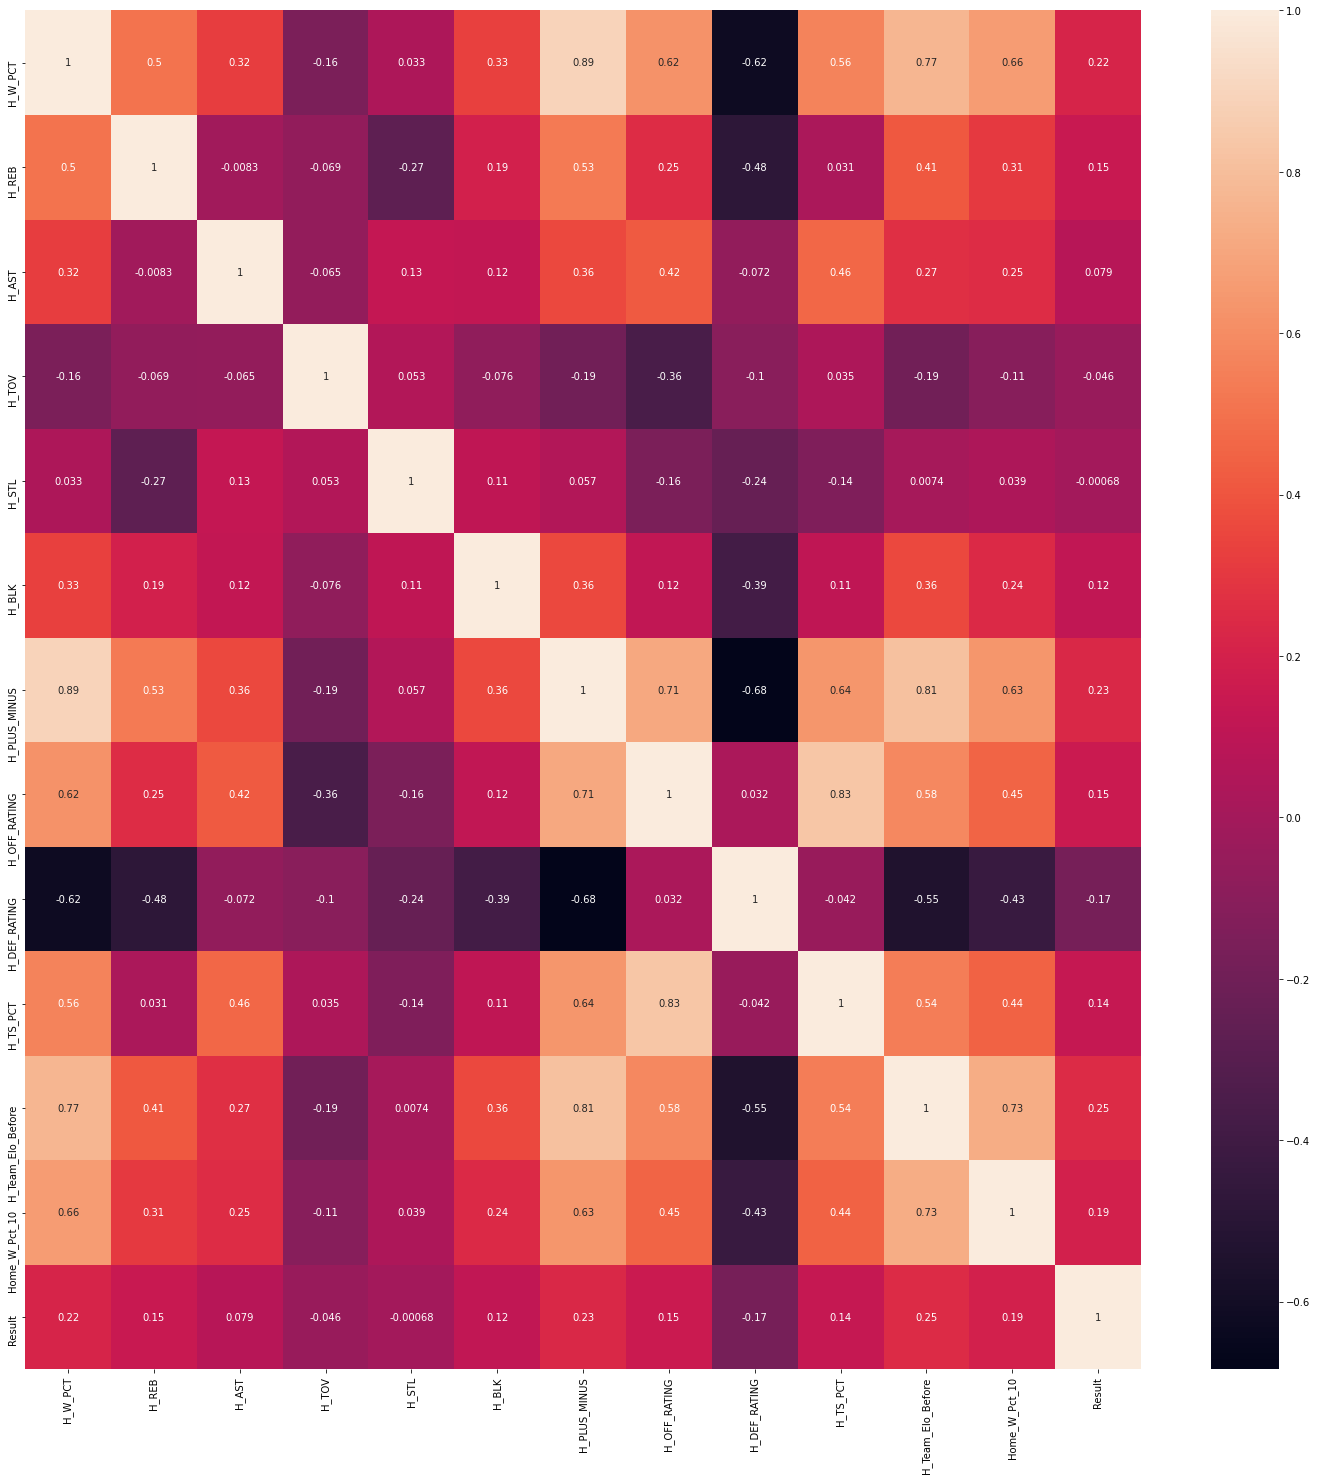

In [5]:
# Correlation figure for our data
plt.figure(figsize=(25, 25))
correlation = final_df[['H_W_PCT', 'H_REB', 'H_AST',
       'H_TOV', 'H_STL', 'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'H_Team_Elo_Before', 'Home_W_Pct_10', 'Result']].corr()

sns.heatmap(correlation, annot=True)
correlation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# final_df.to_csv('final_data_before_model_cleaned.csv',index=None)
X = final_df.drop(columns = 'Result')

y = final_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (2115, 30)
X test shape: (705, 30)


Now we are ready to run our model and see how it performs *MODEL PERFORMANCE*

In [32]:
#script to test the effectivenes of each model, uses default parameters
#test six different classification models 
def run_exps(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    dfs = []
    
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    
    hyperParam = {
        'param_grid_LogReg' : {'C': [0.1, 1.0, 10.0],'penalty': ['l1', 'l2']},
        'param_grid_RF' : {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]},
        'param_grid_KNN' : {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
        'param_grid_SVM': {'C': [0.1, 1.0, 10.0],'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']},
        'param_grid_GNB': {'var_smoothing': [1e-9, 1e-8, 1e-7]},
        'param_grid_XGB': {'learning_rate': [0.01, 0.1, 0.3],'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7]}
    }

    results = []
    
    names = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    target_names = ['win', 'loss']
    
    for name, model in models:
        # Running normally:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print('***********************')
        print(f' Model {name} is finished with normal run.')
        print('***********************')
        # this_df = pd.DataFrame(cv_results)
        # this_df['model'] = name
        # dfs.append(this_df)

        # 
        # 
        # Running with hyperparameter optimization: Optimize all hyperparams
        # 
        param_grid = hyperParam[f'param_grid_{name}']
        

        # Grid Search
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model_grid = grid_search.best_estimator_
        

        # Random Search
        random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
        random_search.fit(X_train, y_train)
        best_model_random = random_search.best_estimator_
        
        # Bayesian Optimization
        # bayes_search = BayesSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
        # bayes_search.fit(X_train, y_train)
        # best_model_bayes = bayes_search.best_estimator_

        print('***********************')
        print(f' Model {name} is started with cross val with best models.')
        print('***********************')

        cv_results_grid = model_selection.cross_validate(best_model_grid, X_train, y_train, cv=kfold, scoring=scoring)
        cv_results_random = model_selection.cross_validate(best_model_random, X_train, y_train, cv=kfold, scoring=scoring)
        # cv_results_bayes = model_selection.cross_validate(best_model_bayes, X_train, y_train, cv=kfold, scoring=scoring)
        cv_results_bayes = cv_results_grid
        
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name+'_none'
        dfs.append(this_df)

        this_df = pd.DataFrame(cv_results_grid)
        this_df['model'] = name+'_Grid'
        dfs.append(this_df)

        this_df = pd.DataFrame(cv_results_random)
        this_df['model'] = name+'_Random'
        dfs.append(this_df)
        
        print('***********************')
        print(f' Model {name} is done.')
        print('***********************')

    final = pd.concat(dfs, ignore_index=True)
    
    return final

final = run_exps(X_train, y_train, X_test, y_test)
final

# Save final to new csv
final.to_csv('final_results_all_tuned.csv',index=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

***********************
 Model LogReg is finished with normal run.
***********************


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

***********************
 Model LogReg is started with cross val with best models.
***********************


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

***********************
 Model LogReg is done.
***********************
***********************
 Model RF is finished with normal run.
***********************
***********************
 Model RF is started with cross val with best models.
***********************
***********************
 Model RF is done.
***********************
***********************
 Model KNN is finished with normal run.
***********************
***********************
 Model KNN is started with cross val with best models.
***********************
***********************
 Model KNN is done.
***********************
***********************
 Model SVM is finished with normal run.
***********************
***********************
 Model SVM is started with cross val with best models.
***********************
***********************
 Model SVM is done.
***********************
***********************
 Model GNB is finished with normal run.
***********************
***********************
 Model GNB is started with cross val with b

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


***********************
 Model GNB is done.
***********************
***********************
 Model XGB is finished with normal run.
***********************
***********************
 Model XGB is started with cross val with best models.
***********************
***********************
 Model XGB is done.
***********************


In [33]:
# final.to_csv('final_results_all_tuned.csv',index=False)
final.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.021753,0.007604,0.607565,0.604542,0.607565,0.605388,0.657472,LogReg_normal
1,0.020687,0.006875,0.652482,0.648990,0.652482,0.644992,0.685920,LogReg_normal
2,0.021096,0.007869,0.654846,0.653425,0.654846,0.646748,0.692576,LogReg_normal
3,0.021098,0.007738,0.619385,0.615445,0.619385,0.609499,0.682051,LogReg_normal
4,0.019882,0.008181,0.652482,0.646856,0.652482,0.643915,0.676450,LogReg_normal


In [34]:
# analyzing how our predicitons were
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

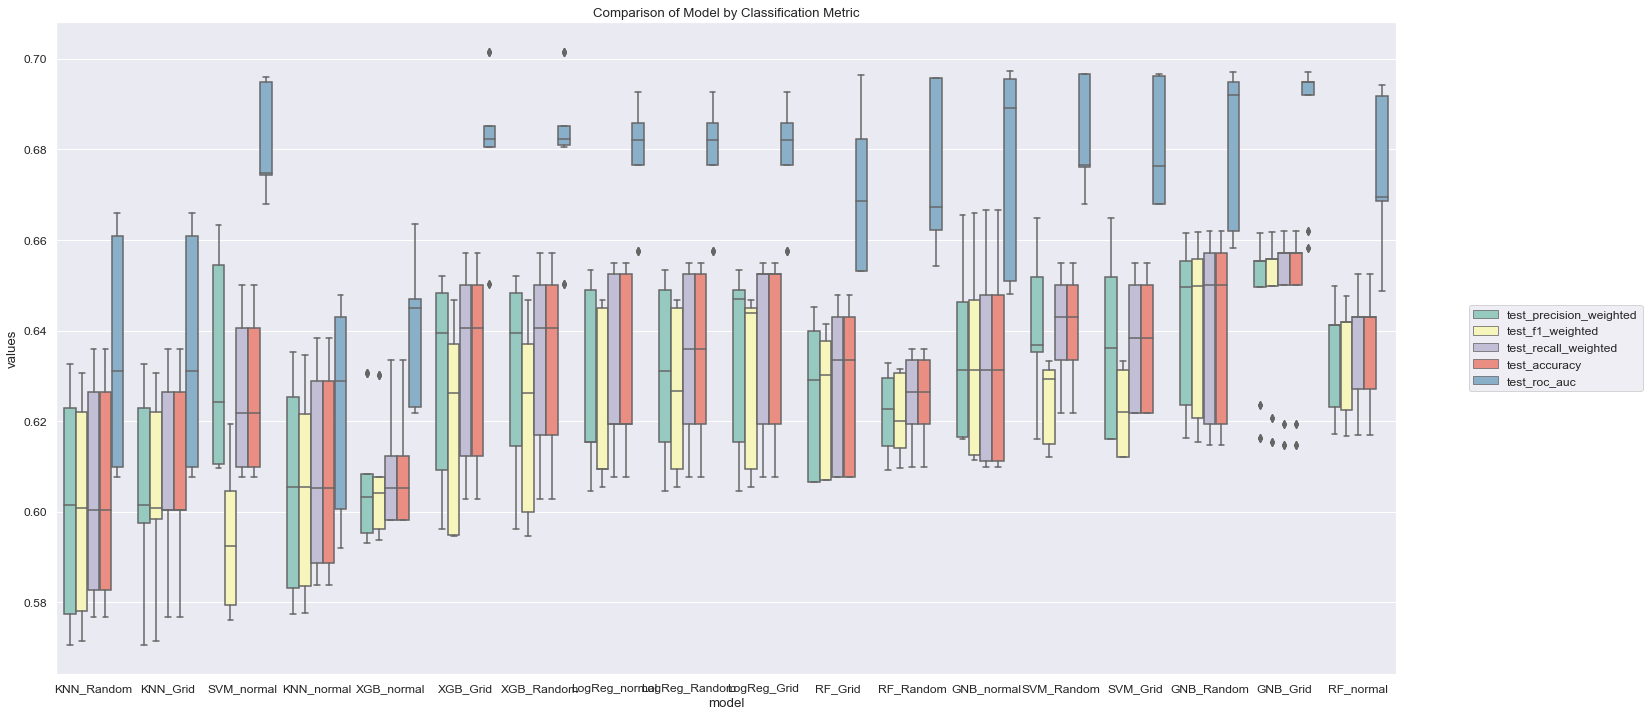

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size and font scale
plt.figure(figsize=(24, 12))
sns.set(font_scale=1.1)  # Adjust font scale as needed

# Plot the boxplot
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")

# Move the legend to the right of the plot with more space
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.5)

# Set the title
plt.title('Comparison of Model by Classification Metric')

# Show the plot
plt.show()


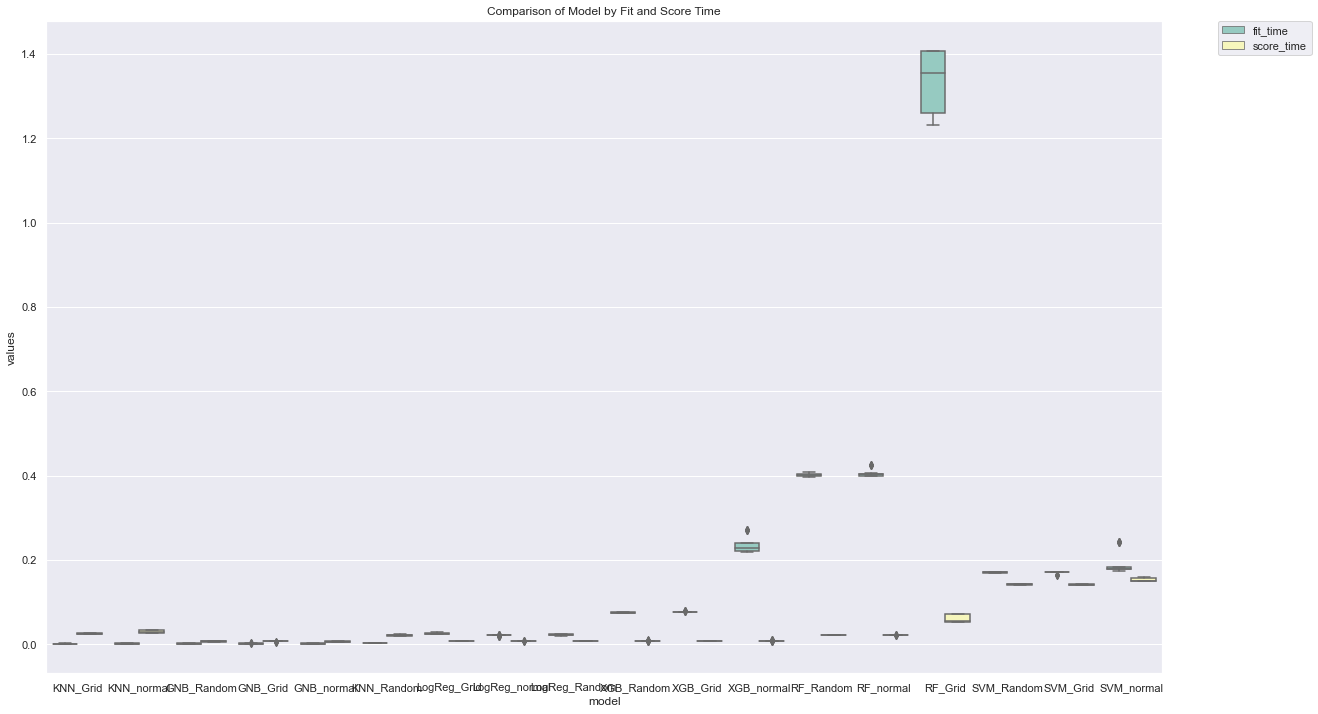

In [36]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.0)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [51]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])



test_precision_weighted           test_roc_auc            \
                                  std      mean          std      mean   
model                                                                    
GNB_Grid                     0.016314  0.647443     0.014997  0.686846   
GNB_Random                   0.016794  0.643089     0.016664  0.682663   
GNB_normal                   0.017253  0.631987     0.021450  0.675992   
KNN_Grid                     0.020367  0.607307     0.024807  0.635838   
KNN_Random                   0.023317  0.602687     0.025565  0.633449   
KNN_normal                   0.021257  0.601180     0.021904  0.619000   
LogReg_Grid                  0.020450  0.631027     0.012265  0.677688   
LogReg_Random                0.020480  0.630051     0.012372  0.678191   
LogReg_normal                0.020456  0.628111     0.012652  0.678377   
RF_Grid                      0.014350  0.626466     0.015847  0.670875   
RF_Random                    0.008164  0.621157     0.016519  0.672486   
RF_normal                    0.012442  0.636704     0.016539  0.675327   
SVM_Grid                     0.019009  0.635518     0.013217  0.680625   
SVM_Random                   0.015786  0.642315     0.011713  0.684161   
SVM_normal                   0.022216  0.631837     0.011008  0.679366   
XGB_Grid                     0.020247  0.632653     0.013592  0.683265   
XGB_Random                   0.021708  0.632071     0.017388  0.680934   
XGB_normal                   0.014090  0.607364     0.016221  0.641456   

              test_f1_weighted           test_recall_weighted            \
                           std      mean                  std      mean   
model                                                                     
GNB_Grid              0.017081  0.647231             0.017827  0.647675   
GNB_Random            0.017790  0.642560             0.018584  0.642632   
GNB_normal            0.018864  0.630605             0.019795  0.630260   
KNN_Grid              0.019352  0.606835             0.020117  0.609929   
KNN_Random            0.022321  0.602405             0.022381  0.606147   
KNN_normal            0.019827  0.600312             0.019972  0.605043   
LogReg_Grid           0.019174  0.627524             0.020522  0.634594   
LogReg_Random         0.019224  0.626413             0.020417  0.633491   
LogReg_normal         0.019104  0.624164             0.020197  0.631442   
RF_Grid               0.013305  0.625936             0.015342  0.629393   
RF_Random             0.008266  0.620479             0.009020  0.624507   
RF_normal             0.012039  0.635976             0.012895  0.638771   
SVM_Grid              0.009769  0.621930             0.014146  0.636643   
SVM_Random            0.008635  0.625303             0.011493  0.642002   
SVM_normal            0.015577  0.595017             0.016448  0.626320   
XGB_Grid              0.021208  0.622344             0.019957  0.635697   
XGB_Random            0.020656  0.623001             0.020857  0.635382   
XGB_normal            0.013626  0.607566             0.013898  0.610638   

              test_accuracy            
                        std      mean  
model                                  
GNB_Grid           0.017827  0.647675  
GNB_Random         0.018584  0.642632  
GNB_normal         0.019795  0.630260  
KNN_Grid           0.020117  0.609929  
KNN_Random         0.022381  0.606147  
KNN_normal         0.019972  0.605043  
LogReg_Grid        0.020522  0.634594  
LogReg_Random      0.020417  0.633491  
LogReg_normal      0.020197  0.631442  
RF_Grid            0.015342  0.629393  
RF_Random          0.009020  0.624507  
RF_normal          0.012895  0.638771  
SVM_Grid           0.014146  0.636643  
SVM_Random         0.011493  0.642002  
SVM_normal         0.016448  0.626320  
XGB_Grid           0.019957  0.635697  
XGB_Random         0.020857  0.635382  
XGB_normal         0.013898  0.610638

In [52]:
bootstrap_df.groupby(['model'])['test_accuracy'].agg([np.std, np.mean])

,std,mean
model,,
GNB_Grid,0.017827,0.647675
GNB_Random,0.018584,0.642632
GNB_normal,0.019795,0.630260
KNN_Grid,0.020117,0.609929
KNN_Random,0.022381,0.606147
KNN_normal,0.019972,0.605043
LogReg_Grid,0.020522,0.634594
LogReg_Random,0.020417,0.633491
LogReg_normal,0.020197,0.631442
